In [13]:
from src.comparison import main
from IPython.display import display
import pandas as pd

result = main()

if result is not None and isinstance(result, pd.DataFrame):
    display(result)
    result.to_csv('data/result.csv', index=False)
else:
    print("No result to display or save.")

Current Working Directory: /Users/arturogonzalez/DataspellProjects/missing_stock_prices_python


/Users/arturogonzalez/DataspellProjects/missing_stock_prices_python/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/arturogonzalez/DataspellProjects/missing_stock_prices_python/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/arturogonzalez/DataspellProjects/missing_stock_prices_python/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



,ARIMA,Gradient Boosting,Random Forest,Spline,Linear,hackerrank
Timestamp,,,,,,
2012-03-13 16:00:00,32.203880,32.023024,32.220000,32.567407,32.540000,32.69
2012-03-21 16:00:00,32.099659,32.346587,32.386600,32.022415,32.120000,32.15
2012-03-26 16:00:00,32.111893,32.428491,32.563100,32.504813,32.405000,32.61
2012-05-24 16:00:00,29.351512,30.128947,29.495000,29.216148,29.380000,29.30
2012-06-01 16:00:00,29.412019,30.329830,31.182250,29.210982,29.196667,28.96
2012-06-04 16:00:00,29.410482,29.995149,30.660200,28.476075,28.973333,28.78
2012-07-20 16:00:00,30.841651,30.642020,30.656800,30.778367,30.320000,31.05
2012-07-23 16:00:00,30.849671,30.137013,29.790300,29.645653,29.840000,29.58
2012-07-26 16:00:00,29.321996,30.184023,29.660300,29.565652,29.590000,29.50


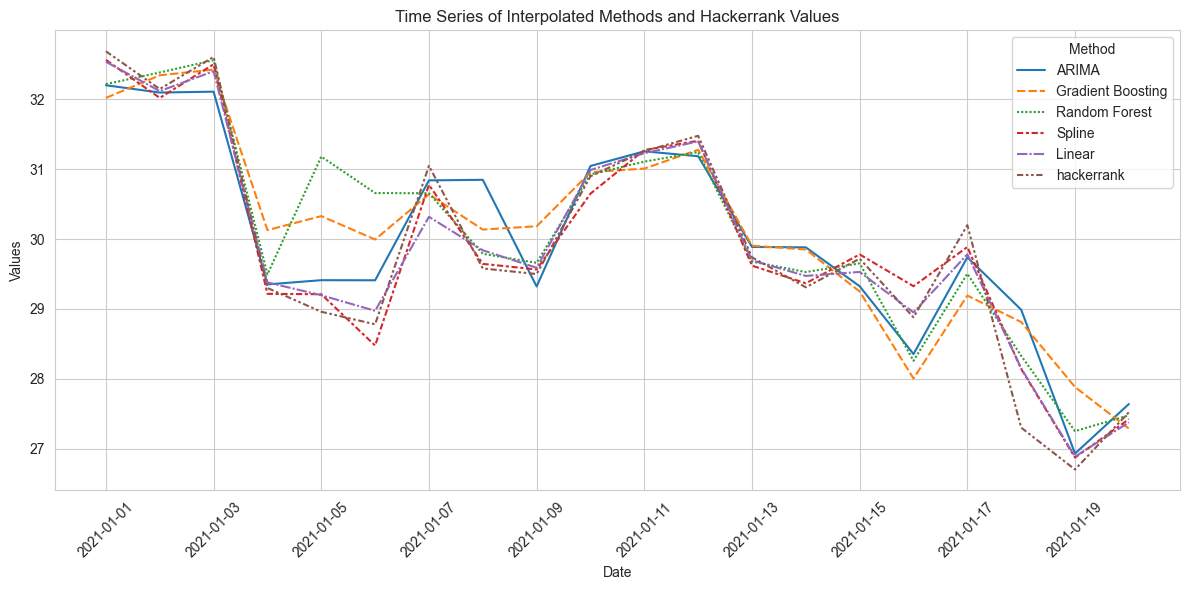

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Generate a date range based on the number of rows assuming daily data starting from a specific date
date_range = pd.date_range(start='2021-01-01', periods=len(result), freq='D')

# Assign this date range as the index of the DataFrame
result['Date'] = date_range
result.set_index('Date', inplace=True)

# Plotting with Seaborn
plt.figure(figsize=(12, 6))  # Set the figure size for better readability
sns.lineplot(data=result)

plt.title('Time Series of Interpolated Methods and Hackerrank Values')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Method')
plt.tight_layout()  # Adjust subplots to give some padding
plt.show()


In [15]:
import pandas as pd
import plotly.express as px

# Assuming 'result' is already loaded and available as a DataFrame
# Generate a date range based on the number of rows assuming daily data starting from a specific date
date_range = pd.date_range(start='2021-01-01', periods=len(result), freq='D')

# Assign this date range as a new column; for Plotly we'll keep it as a column for easier handling
result['Date'] = date_range

# Create the Plotly line chart
fig = px.line(result, x='Date', y=result.columns[:-1], title='Time Series of Interpolated Methods and Hackerrank Values',
              labels={'value': 'Values', 'variable': 'Method', 'Date': 'Date'})

# Update layout for better readability
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Interpolated/Predicted Values',
    legend_title='Method',
    xaxis=dict(
        tickangle=-45,
        nticks=20,
        tickformat='%Y-%m-%d'
    )
)

# Show the plot
fig.show()
